# Mean temperatures have been significantly higher in the last 3 decades as compared to previous decades

This notebook explores the temperature changes in the last decades

In [1]:
# Import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import f_oneway
from scipy.stats import sem
from scipy.stats import linregress
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# Read data and set year column as the index

sunshine = pd.read_csv("Max Temperature.csv", na_values='---')
sunshine.set_index(sunshine.columns[0], inplace = True)
sunshine.head()

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
year,,,,,,,,,,,,,,,,,
1884,7.3,6.8,8.5,10.1,14.5,17.1,18.8,20.2,17.0,11.8,7.5,5.8,NaN,11.02,18.73,12.10,12.14
1885,4.3,7.3,7.2,10.8,11.8,17.0,19.4,16.8,15.0,9.3,7.5,5.9,5.75,9.91,17.76,10.58,11.04
1886,3.7,3.4,6.1,10.5,13.1,16.4,18.7,18.5,16.0,12.9,8.6,4.1,4.36,9.88,17.87,12.51,11.04
1887,4.8,6.9,6.7,9.9,13.0,19.8,20.7,19.1,14.5,10.0,6.6,4.9,5.23,9.88,19.87,10.37,11.44
1888,5.5,3.7,5.2,9.0,14.1,16.3,16.0,16.9,15.4,11.4,8.9,7.1,4.74,9.41,16.38,11.91,10.81


In [3]:
# Create appropriate dataframes and lists for further data analysis


# Create 2 data frames:
# sunshine_1_df contains the data from 1884-1959; sunshine_2_df contains data from 1960 to 2023

start_year = sunshine.index.min()
end_year = sunshine.index.max()

sunshine_1_df = sunshine.loc[start_year:1959]
sunshine_2_df = sunshine.loc[1960:end_year]


# Obtain lists of sunshine data and years

sunshine_1 = sunshine_1_df["ann"].tolist()
sunshine_1_year = sunshine_1_df.index.values.tolist()


sunshine_2 = sunshine_2_df["ann"].tolist()
sunshine_2_year = sunshine_2_df.index.values.tolist()

sunshine_2.pop() # pop last value as NaN value
sunshine_2_year.pop()


# Turn lists into numpy arrays

sunshine_1 = np.array(sunshine_1)
sunshine_1_year = np.array(sunshine_1_year)

sunshine_2 = np.array(sunshine_2)
sunshine_2_year = np.array(sunshine_2_year)


R^2 and equation for line 1: 
R^2: 0.116
Equation: y = 0.00829x + -4.021

R^2 and equation for line 2: 
R^2: 0.542
Equation: y = 0.02892x + -45.226



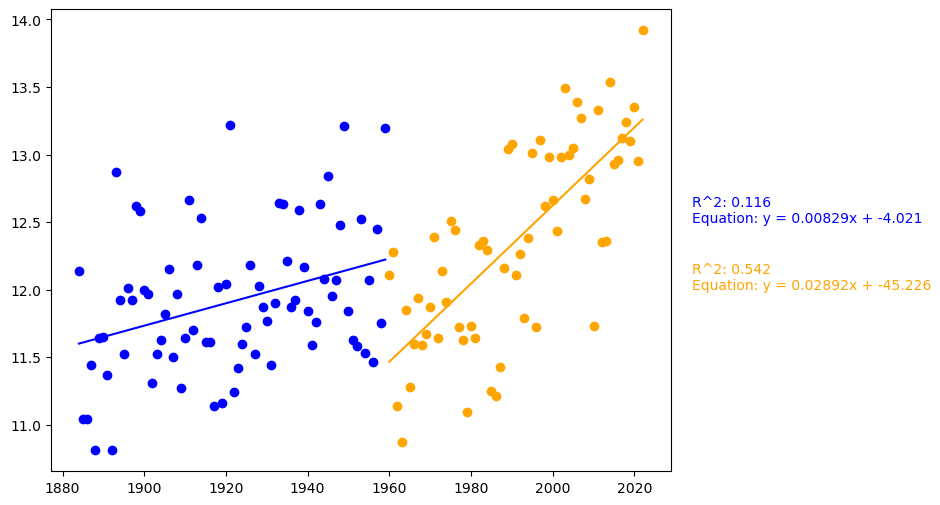

In [4]:
# Linear regression and data plotting


# Linear regresion for both data sets

slope_1, intercept_1, r_value_1, p_value_1, std_err_1 = linregress(sunshine_1_year, sunshine_1)
slope_2, intercept_2, r_value_2, p_value_2, std_err_2 = linregress(sunshine_2_year, sunshine_2)


# Create strings for equation and R^2 value

text_1 = "R^2: " + str(round(r_value_1 * r_value_1, 3)) + "\n" + "Equation: " + "y = " + str(round(slope_1, 5)) + "x + " + str(round(intercept_1, 3))
text_2 = "R^2: " + str(round(r_value_2 * r_value_2, 3)) + "\n" + "Equation: " + "y = " + str(round(slope_2, 5)) + "x + " + str(round(intercept_2, 3))

print("R^2 and equation for line 1: \n", text_1, sep = "")
print("\nR^2 and equation for line 2: \n", text_2, "\n", sep = "")


# Plot data

fig, ax = plt.subplots(figsize = (8, 6))

plt.scatter(sunshine_1_year, sunshine_1, color = "blue")
plt.scatter(sunshine_2_year, sunshine_2, color = "orange")

plt.plot(sunshine_1_year, slope_1 * sunshine_1_year + intercept_1, color = "blue")
plt.plot(sunshine_2_year, slope_2 * sunshine_2_year + intercept_2, color = "orange")

plt.text(2034, 12.5, text_1, color = "blue")
plt.text(2034, 12, text_2, color = "orange")

plt.show()


In [5]:
# Perform statistics on data by decade


# Extract data for each complete decade (i.e. any decade that has 10 values)

decades_data = []

for decade in range(1890, 2020, 10):
    start_year = decade
    end_year = decade + 9
    decade_data = sunshine.loc[(sunshine.index >= start_year) & (sunshine.index <= end_year), 'ann'].tolist()
    decades_data.append(decade_data)
    
# Perform ANOVA

ANOVA = f_oneway(*decades_data)
print("\n\033[4mANOVA Results:\033[0m\n\n", "ANOVA Statistic: ", ANOVA.statistic, "\nANOVA p-value: ", ANOVA.pvalue, "\n\n", sep = "")

# Perform Tukey posthoc

flat_data = np.concatenate(decades_data)
group_labels = np.concatenate([[i] * len(decades_data[i]) for i in range(len(decades_data))])

tukey_posthoc = pairwise_tukeyhsd(flat_data, group_labels)
print("\033[4mTukey Posthoc Test Results:\033[0m\n\n", tukey_posthoc, sep = "")


# Convert group 1 and group 2 numerical values into corresponding decades and show dataframe of only significant comparisons

decades = {
    0: "1890s", 1: "1900s", 2: "1910s", 3: "1920s", 4: "1930s", 5: "1940s",
    6: "1950s", 7: "1960s", 8: "1970s", 9: "1980s", 10: "1990s", 11: "2000s", 12: "2010s"
}


significant_results = pd.DataFrame(data = tukey_posthoc._results_table.data[1:], columns = tukey_posthoc._results_table.data[0])
significant_results = significant_results[significant_results["reject"] == True]
significant_results["group1"] = significant_results["group1"].map(lambda x: decades[x])
significant_results["group2"] = significant_results["group2"].map(lambda x: decades[x])
print("\n\nNumber of significant differences: ", len(significant_results), sep = "")
display(significant_results)


ANOVA Results:

ANOVA Statistic: 7.004557489135291
ANOVA p-value: 1.8550338249523339e-09


Tukey Posthoc Test Results:

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   -0.213 0.9991 -0.9718 0.5458  False
     0      2   -0.102    1.0 -0.8608 0.6568  False
     0      3   -0.043    1.0 -0.8018 0.7158  False
     0      4    0.187 0.9998 -0.5718 0.9458  False
     0      5    0.318 0.9695 -0.4408 1.0768  False
     0      6    0.076    1.0 -0.6828 0.8348  False
     0      7   -0.294 0.9837 -1.0528 0.4648  False
     0      8    0.007    1.0 -0.7518 0.7658  False
     0      9    0.017    1.0 -0.7418 0.7758  False
     0     10    0.579 0.3338 -0.1798 1.3378  False
     0     11    1.049 0.0006  0.2902 1.8078   True
     0     12    0.939 0.0036  0.1802 1.6978   True
     1      2    0.111    1.0 -0.6478 0.8698  False
     1      3     0.17 0.9999 -0.5888 0.9288  F

,group1,group2,meandiff,p-adj,lower,upper,reject
10,1890s,2000s,1.049,0.0006,0.2902,1.8078,True
11,1890s,2010s,0.939,0.0036,0.1802,1.6978,True
20,1900s,1990s,0.792,0.0323,0.0332,1.5508,True
21,1900s,2000s,1.262,0.0000,0.5032,2.0208,True
22,1900s,2010s,1.152,0.0001,0.3932,1.9108,True
31,1910s,2000s,1.151,0.0001,0.3922,1.9098,True
32,1910s,2010s,1.041,0.0006,0.2822,1.7998,True
40,1920s,2000s,1.092,0.0003,0.3332,1.8508,True
41,1920s,2010s,0.982,0.0018,0.2232,1.7408,True
48,1930s,2000s,0.862,0.0119,0.1032,1.6208,True


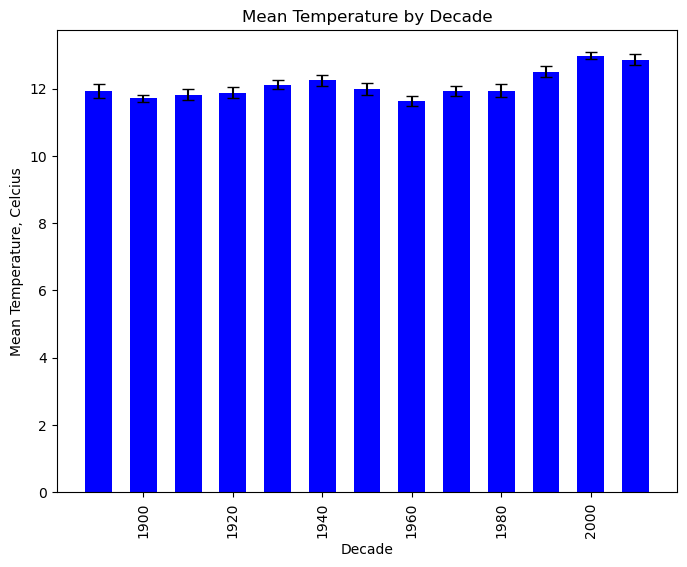

In [6]:
# Plot bar chart of average temperature by decade


# Calculate means and standard errors

temp_means = [np.mean(flat_data[group_labels == group]) for group in np.unique(group_labels)]
temp_SEM = [sem(flat_data[group_labels == group]) for group in np.unique(group_labels)]


# Create new group labels, corresponding to each decade of the data

group_labels_decade = (1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010)
group_labels_decade = np.array(group_labels_decade)


# Plot the bar graph with error bars

figure, ax = plt.subplots(figsize = (8, 6)) 

plt.bar(group_labels_decade, temp_means, yerr = temp_SEM, capsize = 4, color= 'blue', width = 6)
plt.xticks(rotation = 90)
plt.xlabel('Decade')
plt.ylabel('Mean Temperature, Celcius')
plt.title('Mean Temperature by Decade')

plt.show()
